C:\Users\hp\Downloads
Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings DataFrame:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

Summary Statistics for Movies DataFrame:
              movieId        title genres
count     9742.000000         974

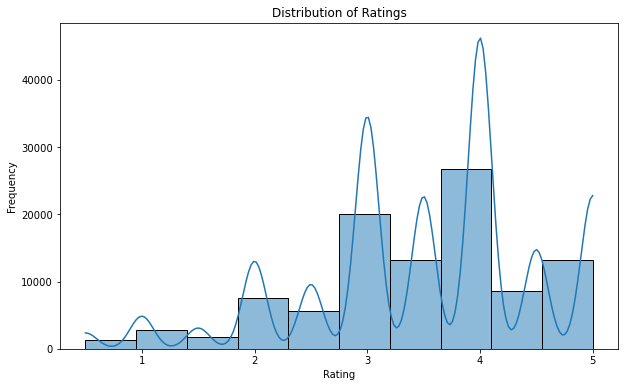

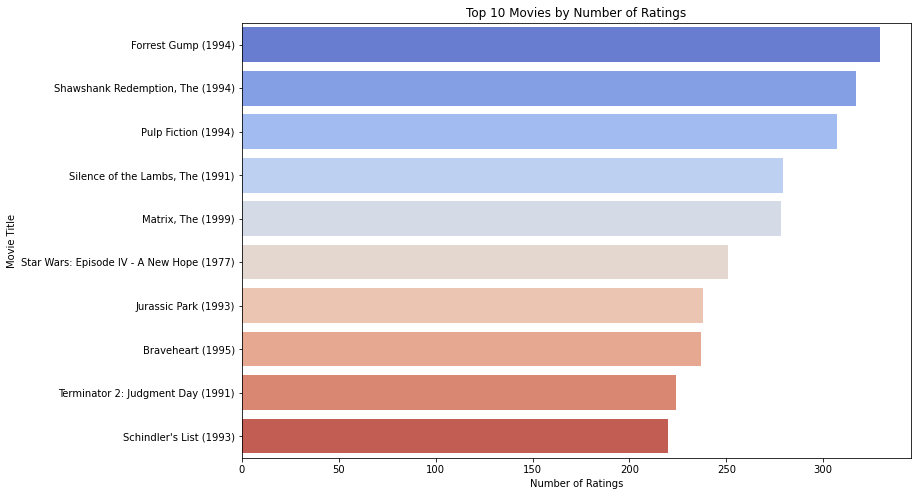

<Figure size 720x576 with 0 Axes>

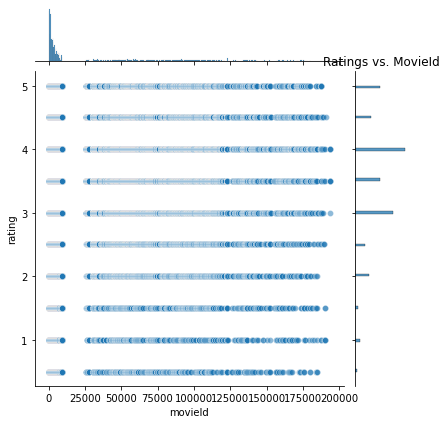

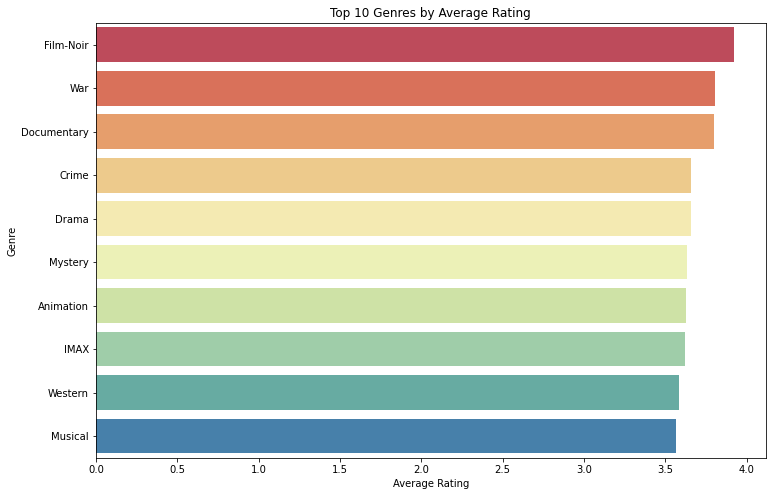

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

current_dir = os.getcwd()
print(current_dir)

df1 = pd.read_csv('movies.csv')
df2 = pd.read_csv('ratings.csv')

print("Movies DataFrame:")
print(df1.head())
print("\nRatings DataFrame:")
print(df2.head())

# Display summary statistics
print("\nSummary Statistics for Movies DataFrame:")
print(df1.describe(include='all'))
print("\nSummary Statistics for Ratings DataFrame:")
print(df2.describe())

# Check for missing values
print("\nMissing Values in Movies DataFrame:")
print(df1.isnull().sum())
print("\nMissing Values in Ratings DataFrame:")
print(df2.isnull().sum())

merged_df = pd.merge(df1, df2, on='movieId')
merged_df.to_csv('merged_file.csv', index=False)

# Display the first few rows of the merged DataFrame
print(merged_df.head())

# Check for duplicates
print("\nDuplicates in Merged DataFrame:")
print(merged_df.duplicated().sum())

# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df2['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Number of Ratings per Movie
rating_counts = merged_df['title'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette='coolwarm')
plt.title('Top 10 Movies by Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

#Jointplot of Ratings vs. MovieId:
plt.figure(figsize=(10, 8))
sns.jointplot(x='movieId', y='rating', data=merged_df, kind='scatter', alpha=0.5)
plt.title('Ratings vs. MovieId')
plt.xlabel('MovieId')
plt.ylabel('Rating')
plt.show()

# Genre Analysis
if 'genres' in df1.columns:
    merged_df['genres'] = merged_df['genres'].str.split('|')
    genre_ratings = merged_df.explode('genres').groupby('genres')['rating'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='Spectral')
    plt.title('Top 10 Genres by Average Rating')
    plt.xlabel('Average Rating')
    plt.ylabel('Genre')
    plt.show()
    
